# Machine Learning
membuat program yang lebih otomatis daripada menulis code baris per baris. kita gunakan algoritma untuk bikin model

Terminologi:
- model - program hasil pelatihan sebuah machine learning algorithm, algoritma ML + dataset --> selesai latihan, jadilah model ML
- fitur - bagian dari dataset yang kita gunakan sebagai "input" model ML
- target - bagian dari dataset yang kita gunakan sebagai "output" model ML
- dataset - data yang kita gunakan

## Supervised
tipe machine learning yang memiliki target. digunakan untuk membuat prediksi

### Regression
saat target berbentuk angka continuous

### Classification
saat target berbentuk discrete/ kategorikal

## Unsupervised
tipe machine learning yang BUKAN supervised, tidak ada target. Contohnya adalah Clustering dan Dimensionality Reduction


Note:   
Deep Learning: satu level diatas machine learning, lebih rumit dengan algoritmanya, dan lebih otomatis dibandingkan machine learning.


# Regression
kita akan pelajari algoritma Linear Regression dan Polynomial Regression untuk membuat model Machine Learning

saat melatih sebuah model machine learning, kita perlu ikuti beberapa langkah berikut:
1. koleksi data (kalau di riil, data pribadi perusahaan, atau buat survey sendiri, atau kumpulin data sendiri, ...) (kalau di kelas, utk latihan, kita ambil saja data dari kaggle)
2. siapkan data, termasuk data cleaning, explore, perhatikan kira2 model seperti apa yang masuk akal, yang bisa dibuat, yang mau dibuat, dari data seperti ini
3. train model, pilih algoritma ML yang mau digunakan, dan kita latih model ML dengan algoritma + dataset yang sudah kita siapkan
4. evaluasi, apakah model bagus? akurat? underfit/overfit tidak? gunakan teknik teknik evaluasi untuk mengira-ngira modelnya bagus atau tidak
5. tuning, kita ulang kembali step 1-4 bisa lompat2, untuk membuat model yang terbaik

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

di contoh kali ini, kita gunakan data diabetes dari https://raw.githubusercontent.com/stefkwan-h8/dataset/main/diabetes.csv untuk membuat sebuah model regression.

tujuannya adalah untuk prediksi BMI seseorang dari fitur:
- glucose
- bloodpressure
- insulin
- age

jadi model kita akan menerima 4 input fitur diatas untuk memprediksi 1 target (BMI)

In [ ]:
# 1. koleksi data
df_diabetes = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes_copy = df_diabetes.copy()

In [ ]:
# 2. siapkan data
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


biasanya di step ini kita lakukan:
- data cleaning: missing values, invalid values, outlier
- encoding: data tipe non-numerik kita konversi jadi numerik, karena ML cuma bisa terima data tipe numerik
- scaling: ubah skala datanya supaya setiap fitur dianggap sama pentingnya oleh model ML
- data splitting: memisahkan dataset jadi dua bagian, satu untuk latihan, dan satu untuk test modelnya setelah selesai dilatih
- data visualization: mencoba cari pattern/ trend di datanya untuk lebih mengerti datanya dan nanti kita bisa tau hasil dari model ML masuk akal atau tidak
- dan teknik lainnya

di contoh kali ini, kita tidak lakukan step2 diatas, kita langsung lanjut ke step berikut, melatih model

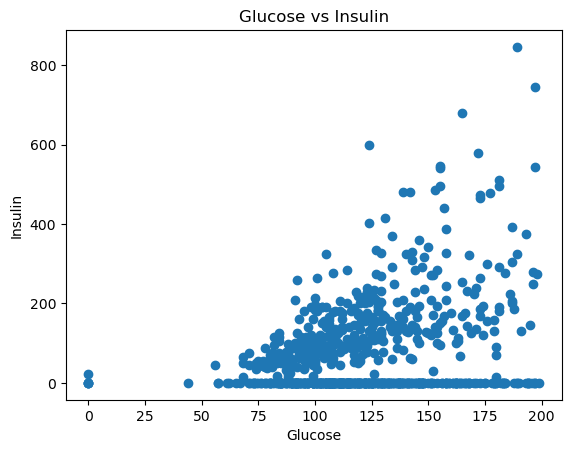

In [ ]:
# sebagai contoh kita gunakan 1 fitur dan 1 target --> fitur Glucose, target Insulin

fitur = df_diabetes[['Glucose']] # fitur 2 dimensi, persiapan bisa ada lebih dari 1 fitur
target = df_diabetes['Insulin'] # target 1 dimensi, target cuma 1

# extra: visualisasikan target dan fitur, karena hanya ada 1 fitur kita bisa buat chart 2 dimensi untuk melihat hubugan fitur dan target
plt.scatter(fitur, target)

plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Glucose vs Insulin")

plt.show()

In [ ]:
# 3. latih model
model_insulin = LinearRegression() # pilih algoritma Linear Regression
model_insulin.fit(fitur, target) # masukkan datanya, input fitur dan output target


LinearRegression()

untuk model tipe Linear Regression, kita gunakan angka korelasi R-squared untuk mengevaluasi model tersebut.

angka R-squared mendekati 0 artinya model tidak bisa membuat prediksi dengan baik (underfit)

angka R-squared mendekati 1 artinya model memprediksi terlalu sempurna - seperti menghafal data latihannya dan bukan membuat general model yang baik (overfit)

In [ ]:
# 4. evaluasi
# apakah modelnya bisa memprediksi dengan baik?
r_sq = model_insulin.score(fitur, target)
print(r_sq)

0.10979753429467365


In [ ]:
fitur

,Glucose
0,148
1,85
2,183
3,89
4,137
...,...
763,101
764,122
765,121
766,126


EXTRA step - model yang sudah dibuat, kita bisa pakai untuk bikin prediksi karena ini adalah model Regression.

kita pakai modelnya. contoh, kalau ada orang dengan tingkat glucose di 100, kira kira berapa insulinnya?

In [ ]:
[[100]]

[[100]]

In [ ]:
hasil_prediksi_insulin = model_insulin.predict([[100]])
print(hasil_prediksi_insulin)

[54.84381932]


dari model Linear Regression yang kita buat, kalau glucose di 100, model membuat prediksi insulin di 54.8

kita bisa buat prediksi untuk banyak data sekaligus, misalnya, untuk glucose level  0,50,100,150,200 berapa tingkat insulin yang di prediksi modelnya

In [ ]:
test_data_glucose = np.arange(0,201,50).reshape(-1, 1)
test_data_glucose

array([[  0],
       [ 50],
       [100],
       [150],
       [200]])

In [ ]:
hasil_prediksi_insulin = model_insulin.predict(test_data_glucose)
hasil_prediksi_insulin

array([-64.59250373,  -4.8743422 ,  54.84381932, 114.56198085,
       174.28014237])

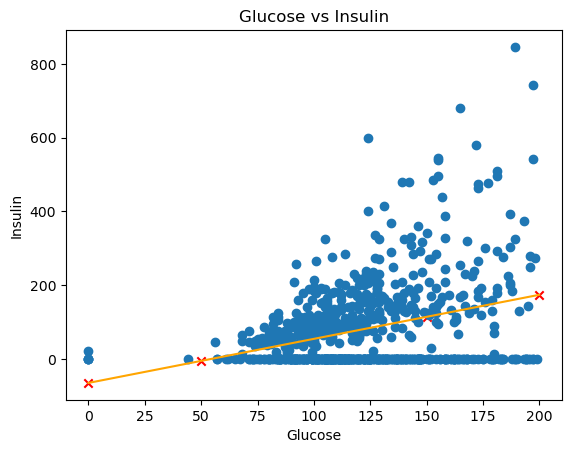

In [ ]:
# optional: buat visualisasi

plt.scatter(test_data_glucose, hasil_prediksi_insulin, color="red", marker="x")
plt.plot(test_data_glucose, hasil_prediksi_insulin, color="orange")

plt.scatter(fitur, target)

plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Glucose vs Insulin")

plt.show()

In [ ]:
# 5. tuning
# kita coba ubah/ tambahkan teknik dari step 1-4 untuk membuat model yang lebih baik

# Polynomial Regression

secara konsep matematik, polynomial regression mirip dengan linear regression. linear regression adalah polynomial regression degree 1.

polynomial regression degree 1, tidak berbelok, sama persis dengan linear regression.

polynomial regression degree 2, ada x kuadrat, akan membuat secara visual garis regresi yang kita buat bisa berbelok 1x.

polynomial regression degree 3, ada x kuadrat, ada x kubik, akan membuat berbelok 2x... dan seterusnya...


secara coding, karena memang sangat mirip, sklearn tidak membuat package berbeda untuk model polynomial regression. sklearn hanya membuat step tambahan "PolynomialFeatures" yang dilakukan sebelum "LinearRegression" untuk membuat model Polynomial Regression.

In [ ]:
fitur

,Glucose
0,148
1,85
2,183
3,89
4,137
...,...
763,101
764,122
765,121
766,126


In [ ]:
target

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [ ]:
# step 2, persiapan data
# membuat model polynomial regression

transformer = PolynomialFeatures(
    degree=2,  # degree 2, ada x kuadrat, belok 1x
    include_bias=False # selalu set include bias ke False saat kita gunakan sklearn untuk bikin model LinearRegression
    )

# ubah data kita menjadi tipe polinomial
fitur_poly = transformer.fit_transform(fitur)
fitur_poly

array([[  148., 21904.],
       [   85.,  7225.],
       [  183., 33489.],
       ...,
       [  121., 14641.],
       [  126., 15876.],
       [   93.,  8649.]])

kita sudah siapkan data fitur kita, menjadi versi polynomial

menggunakan data versi polynomial, kita buat model LinearRegression() dari sklearn untuk membuat model Polynomial Regression

In [ ]:
# step 3, melatih model
model_insulin_poly = LinearRegression()
model_insulin_poly.fit(fitur_poly, target)

LinearRegression()

step evaluasi, kita cek berapa skor r-squared nya

In [ ]:
# step 4, evaluasi model
# apakah modelnya bisa memprediksi dengan baik?
r_sq = model_insulin_poly.score(fitur_poly, target)
print(r_sq)

0.11237305311002188


sebenarnya sama sama tidak akurat, r-squared nya mendekati 0

berikut kita masuk ke step optional, untuk melihat model kita secara visual. hanya bisa dilakukan jika kita punya 1 fitur saja.

In [ ]:
test_data_glucose

array([[  0],
       [ 50],
       [100],
       [150],
       [200]])

In [ ]:
test_data_glucose_poly = transformer.fit_transform(test_data_glucose)
test_data_glucose_poly

array([[    0.,     0.],
       [   50.,  2500.],
       [  100., 10000.],
       [  150., 22500.],
       [  200., 40000.]])

tes datanya juga kita ubah jadi versi polynomial

setelah itu kita bisa buat visualisasi untuk model polynomial regression kita

In [ ]:
hasil_prediksi_insulin_poly = model_insulin_poly.predict(test_data_glucose_poly)
hasil_prediksi_insulin_poly

array([-13.93424554,  10.74434846,  53.17978452, 113.37206264,
       191.32118282])

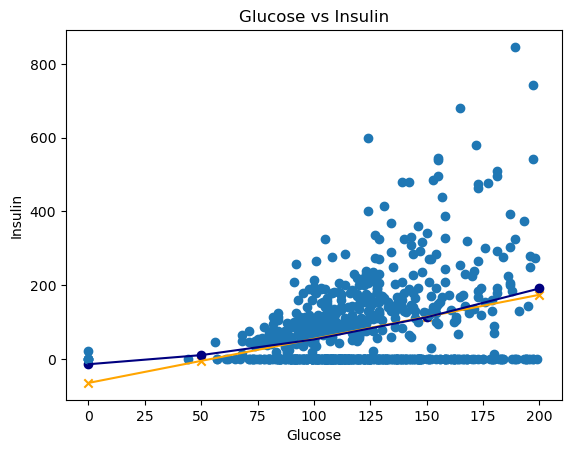

In [ ]:
# optional: buat visualisasi

# model linear regression
plt.scatter(test_data_glucose, hasil_prediksi_insulin, color="orange", marker="x")
plt.plot(test_data_glucose, hasil_prediksi_insulin, color="orange")

# model polynomial regression
plt.scatter(test_data_glucose, hasil_prediksi_insulin_poly, color="navy", marker="o")
plt.plot(test_data_glucose, hasil_prediksi_insulin_poly, color="navy")

# dataset awal
plt.scatter(fitur, target)

# labels
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Glucose vs Insulin")

plt.show()

## latihan pendek
coba buat model polynomial regression dengan degree 3

lalu visualisasikan hasil modelnya seperti diatas

setelah itu kita lanjut ke contoh membuat model dengan lebih dari 1 fitur

In [ ]:
# 1. collect data - kita gunakan data yang sama df_diabetes
# 2. siapkan data - kita lakukan data cleaning yang sama, validasi, siapkan fitur dan target yang sama

print("Fitur - tingkat glucose")
display(fitur.head())
print("Target - tingkat insulin")
display(target[:5])

Fitur - tingkat glucose


,Glucose
0,148
1,85
2,183
3,89
4,137


Target - tingkat insulin


0      0
1      0
2      0
3     94
4    168
Name: Insulin, dtype: int64

In [ ]:
# step persiapan data untuk polynomial regression, kita ubah fitur menjadi versi polynomial

# buat transformer
transformer = PolynomialFeatures(degree=3, include_bias=False)

# ubah fitur jadi versi polynomial
fitur_poly = transformer.fit_transform(fitur)

# 3. membuat model
# kita buat model polynomial regression dari function LinearRegression() dengan input fitur tipe Polynomial
model_insulin_v3 = LinearRegression()
model_insulin_v3.fit(fitur_poly, target)

# 4. evaluasi model
# untuk tipe model Regression kita cari angka r_squared nya
r_sq = model_insulin_v3.score(fitur_poly, target)
# perhatikan kita menggunakan data yang sama saat melatih dan mengecek akurasi model,
# kedepannya kita mau bedakan data latihan dan data test, dengan menggunakan teknik data splitting
# split dulu jadi train dan test data, baru latih model, baru evaluasi model

print("R squared:", r_sq)

R squared: 0.11297771173056503


In [ ]:
# membuat prediksi dari tes data

# membuat test data versi polynomial degree 3
test_data = transformer.fit_transform(test_data_glucose)

# membuat prediksi dengan model polynomial regression degree 3 yang barusan kita buat
hasil_prediksi_insulin_v3 = model_insulin_v3.predict(test_data)

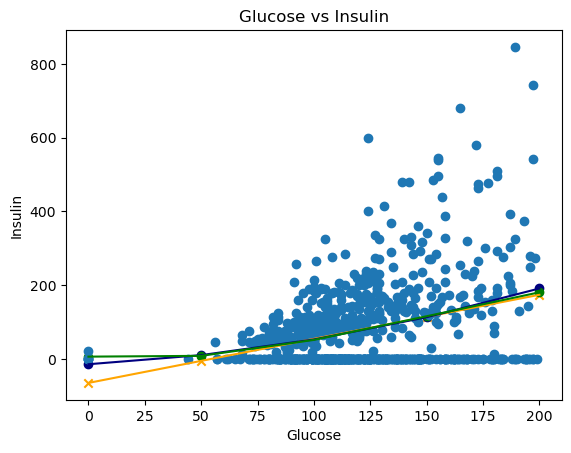

In [ ]:
# optional: buat visualisasi

# model linear regression
plt.scatter(test_data_glucose, hasil_prediksi_insulin, color="orange", marker="x")
plt.plot(test_data_glucose, hasil_prediksi_insulin, color="orange")

# model polynomial regression degree 2
plt.scatter(test_data_glucose, hasil_prediksi_insulin_poly, color="navy", marker="o")
plt.plot(test_data_glucose, hasil_prediksi_insulin_poly, color="navy")

# model polynomial regression degree 3
plt.scatter(test_data_glucose, hasil_prediksi_insulin_v3, color="green", marker="o")
plt.plot(test_data_glucose, hasil_prediksi_insulin_v3, color="green")

# dataset awal
plt.scatter(fitur, target)

# labels
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Glucose vs Insulin")

plt.show()

## Model Linear dan Polynomial Regression dengan lebih dari 1 fitur

balik ke tujuan awal kita hari ini, kita mau buat model tipe regression,
tujuannya adalah untuk prediksi **BMI** seseorang dari fitur:
- glucose
- bloodpressure
- insulin
- age

In [ ]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Linear Regression

# siapin fitur dan target
X = df_diabetes[['Glucose', 'BloodPressure', 'Insulin', 'Age']]
y = df_diabetes['BMI']

# buat dan latih model
model = LinearRegression()
model.fit(X, y)

# evaluasi model
r_sq = model.score(X, y)
print("R-Squared:", r_sq)

R-Squared: 0.1301928376242355


In [ ]:
# Polynomial Regression

# siapin fitur dan target
X = df_diabetes[['Glucose', 'BloodPressure', 'Insulin', 'Age']]
y = df_diabetes['BMI']

# ubah data latihan kita menjadi versi polynomial
transformer = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = transformer.fit_transform(X)

# buat dan latih model
model2 = LinearRegression()
model2.fit(X_poly, y)

# evaluasi model
r_sq = model2.score(X_poly, y)
print("R-Squared:", r_sq)

R-Squared: 0.22116814353684033


In [ ]:
# Polynomial Regression

# siapin fitur dan target
X = df_diabetes[['Glucose', 'BloodPressure', 'Insulin', 'Age']]
y = df_diabetes['BMI']

# ubah data latihan kita menjadi versi polynomial
transformer = PolynomialFeatures(degree = 10, include_bias = False)
X_poly = transformer.fit_transform(X)

# buat dan latih model
model3 = LinearRegression()
model3.fit(X_poly, y)

# evaluasi model
r_sq = model3.score(X_poly, y)
print("R-Squared:", r_sq)

R-Squared: 0.14876195944366266


EXTRA

kita pelajari teknik "Data Splitting"

memisahkan dataset kita menjadi dua: train data, test data

kita gunakan train_test_split dari sklearn.model_selection

In [ ]:
# siapin fitur dan target
X = df_diabetes[['Glucose', 'BloodPressure', 'Insulin', 'Age']]
y = df_diabetes['BMI']

# split jadi train dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.head()

,Glucose,BloodPressure,Insulin,Age
762,89,62,0,33
127,118,58,94,23
564,91,80,0,27
375,140,82,325,58
663,145,80,130,40


In [ ]:
# latih model dengan train data
model = LinearRegression()
model.fit(X_train, y_train)

# evaluasi model dengan test data
r_sq = model.score(X_test, y_test)
print("R-squared:", r_sq)

R-squared: 0.06807543236940539


apa yang terjadi kalau kita gunakan data latihan (train) untuk cek skor model?

kita bisa membuat observasi underfit/ overfit

kalau skor model r_sq tinggi dengan data train, tapi rendah dengan data test, berarti model overfit

kalau skor model r_sq rendah dengan data train maupun data test, berarti model underfit

In [ ]:
model.score(X_train, y_train)

0.1435691416861793